<a href="https://colab.research.google.com/github/Nurhidaya244012/PMA_MRTB1123/blob/main/A1_PMA_MRTB_1123_Nurhidaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded Excel file
file_path = '/content/Augmented_Pfizer.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to locate the data
xls.sheet_names

['Sheet1']

In [ ]:
# Load data from 'Sheet1'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows to inspect the structure
df.head()

,Drug A,Drug B
0,258,219
1,214,283
2,243,291
3,227,277
4,235,258


In [ ]:
# Analyze central tendency and variability for Drug A and Drug B
summary_stats = df.describe().T  # Transpose for readability
summary_stats['variance'] = df.var()
summary_stats['range'] = df.max() - df.min()
summary_stats

,count,mean,std,min,25%,50%,75%,max,variance,range
Drug A,200.0,234.14,13.780782,211.0,222.0,240.0,243.5,258.0,189.909950,47
Drug B,200.0,271.26,18.266107,219.0,265.0,273.0,286.0,291.0,333.650653,72


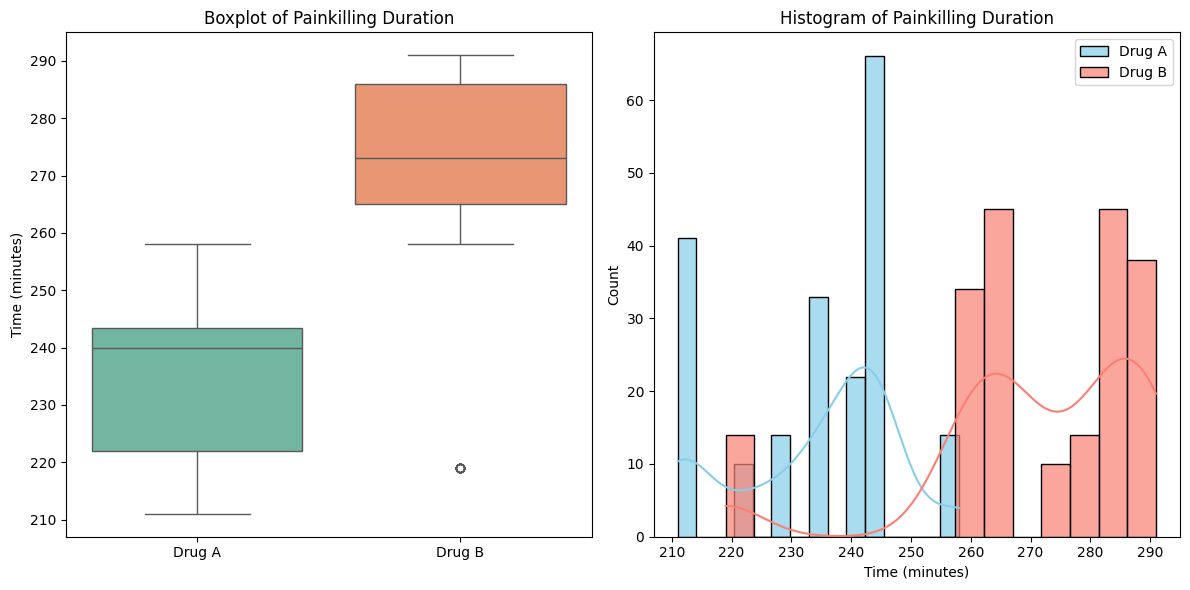

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, palette="Set2")
plt.title('Boxplot of Painkilling Duration')
plt.ylabel('Time (minutes)')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Drug A'], bins=15, kde=True, color='skyblue', label='Drug A', alpha=0.7)
sns.histplot(df['Drug B'], bins=15, kde=True, color='salmon', label='Drug B', alpha=0.7)
plt.title('Histogram of Painkilling Duration')
plt.xlabel('Time (minutes)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate sample coefficient of variation (CV) = (Standard Deviation / Mean) * 100%
cv_drug_a = (summary_stats.loc['Drug A', 'std'] / summary_stats.loc['Drug A', 'mean']) * 100
cv_drug_b = (summary_stats.loc['Drug B', 'std'] / summary_stats.loc['Drug B', 'mean']) * 100

cv_results = pd.Series({'Drug A': cv_drug_a, 'Drug B': cv_drug_b})
cv_results

,0
Drug A,5.885702
Drug B,6.733800


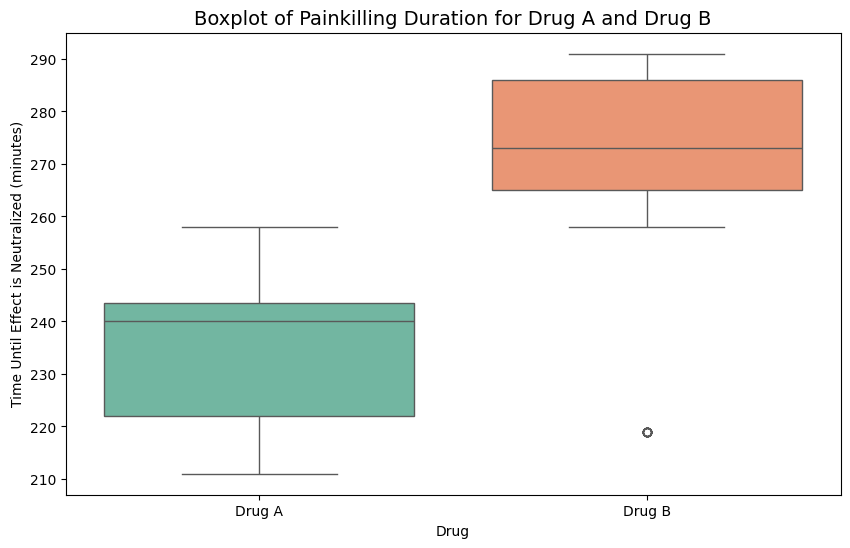

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the filename if needed)
df = pd.read_excel("Augmented_Pfizer.xlsx")

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Painkilling Duration for Drug A and Drug B", fontsize=14)
plt.xlabel("Drug")
plt.ylabel("Time Until Effect is Neutralized (minutes)")
plt.xticks([0, 1], ["Drug A", "Drug B"])
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Load the dataset (adjust the filename if needed)
df = pd.read_excel("Augmented_Pfizer.xlsx")

# Extract the two samples
drug_a = df['Drug A']
drug_b = df['Drug B']

# Step 1: Test for Normality (Shapiro-Wilk Test)
shapiro_a = shapiro(drug_a)
shapiro_b = shapiro(drug_b)

print("Shapiro-Wilk Test for Drug A:", shapiro_a)
print("Shapiro-Wilk Test for Drug B:", shapiro_b)

# Step 2: Choose the appropriate test based on normality
if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    # Both samples are normally distributed — use Independent t-Test
    ttest = ttest_ind(drug_a, drug_b, equal_var=False)  # Welch’s t-test (safe for unequal variances)
    print("\nIndependent Samples t-Test Result:", ttest)
else:
    # Non-normal data — use Mann-Whitney U Test
    mwu_test = mannwhitneyu(drug_a, drug_b, alternative='two-sided')
    print("\nMann-Whitney U Test Result:", mwu_test)

Shapiro-Wilk Test for Drug A: ShapiroResult(statistic=np.float64(0.8924732357587098), pvalue=np.float64(8.554793815631954e-11))
Shapiro-Wilk Test for Drug B: ShapiroResult(statistic=np.float64(0.818639929593285), pvalue=np.float64(1.6240614505176908e-14))

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=np.float64(2338.0), pvalue=np.float64(7.454294091199276e-53))


In [ ]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Load the dataset (ensure file is in your working directory)
df = pd.read_excel("Augmented_Pfizer.xlsx")

# Extract data for both drugs
drug_a = df['Drug A']
drug_b = df['Drug B']

# Step 1: Normality Test (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
shapiro_a = shapiro(drug_a)
shapiro_b = shapiro(drug_b)
print(f"Drug A: Statistic = {shapiro_a.statistic:.4f}, p-value = {shapiro_a.pvalue:.4f}")
print(f"Drug B: Statistic = {shapiro_b.statistic:.4f}, p-value = {shapiro_b.pvalue:.4f}")

# Step 2: Choose test based on normality
if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    print("\nBoth samples are normally distributed. Performing Independent Samples t-Test...")
    ttest_result = ttest_ind(drug_a, drug_b, equal_var=False)  # Welch's t-test
    print(f"T-statistic = {ttest_result.statistic:.4f}, p-value = {ttest_result.pvalue:.4f}")
else:
    print("\nNon-normal distribution detected. Performing Mann-Whitney U Test...")
    mwu_result = mannwhitneyu(drug_a, drug_b, alternative='two-sided')
    print(f"U-statistic = {mwu_result.statistic:.4f}, p-value = {mwu_result.pvalue:.4f}")


Normality Test (Shapiro-Wilk):
Drug A: Statistic = 0.8925, p-value = 0.0000
Drug B: Statistic = 0.8186, p-value = 0.0000

Non-normal distribution detected. Performing Mann-Whitney U Test...
U-statistic = 2338.0000, p-value = 0.0000
